In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os

plt.rcParams['figure.figsize'] = [16,8]

I'll use a picture of my cat:

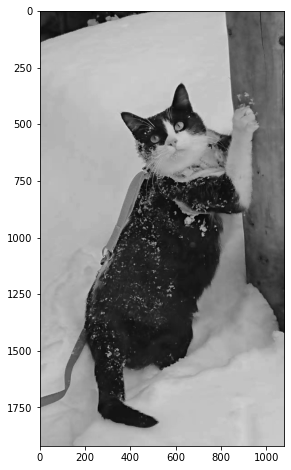

In [4]:
A = imread('cat.jpg')  # read image
X = np.mean(A, -1)  # gray scale

img = plt.imshow(X)
img.set_cmap('gray')
#plt.axis('off')
plt.show()

In [9]:
U,S,Vᵀ = np.linalg.svd(X, full_matrices = False)  # using S for ∑.
S = np.diag(S)  # singular values
S

array([[1.96544938e+05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.64684419e+04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 4.15080541e+04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.78796105e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.71201087e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.62333401e+00]])

In [14]:
print((len(U),len(U[0])))  # size of the matrix U: num of rows x num of columns
print((len(S),len(S[0])))  # size of the matrix S
print((len(Vᵀ),len(Vᵀ[0])))  # size of the matrix Vᵀ

(1920, 1080)
(1080, 1080)
(1080, 1080)


Since we've set `full_matrices = False`, so the SVD matrices are economy size matrices, meaning the size of U is $n \times m$ instead of $n \times n$, S and Vᵀ are $m \times m$, in this case

There are 1080 rows and columns in singular value matrix S, which is a lot if we want to use them to analyze.  
Now try to truncate them into smaller matrices, with rank = 5, 20, 100:

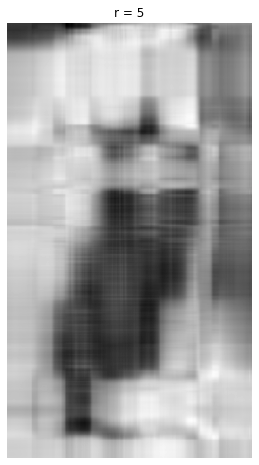

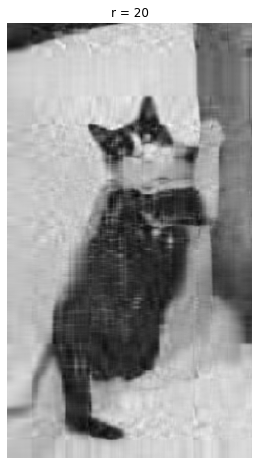

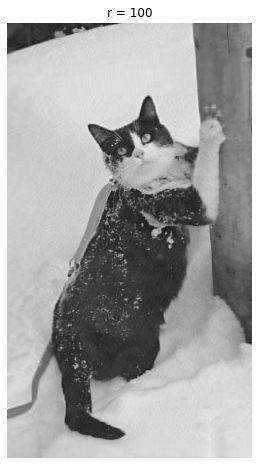

In [15]:
j = 0
for r in (5,20,100):
    Xapprox = U[:,:r] @ S[0:r, :r] @ Vᵀ[:r, :]  # multiply truncated SVD matrices to get an approx image.
    plt.figure(j+1)
    img = plt.imshow(Xapprox)
    img.set_cmap("gray")
    plt.axis('off')
    plt.title('r = '+str(r))
    plt.show()

We can see that a cat can be recognized when we only use 20 singular values stored in matrix S. And when we use 100 of them, the picture generated by multiplying the corresponding truncated SVD matrices is pretty nice and clear.

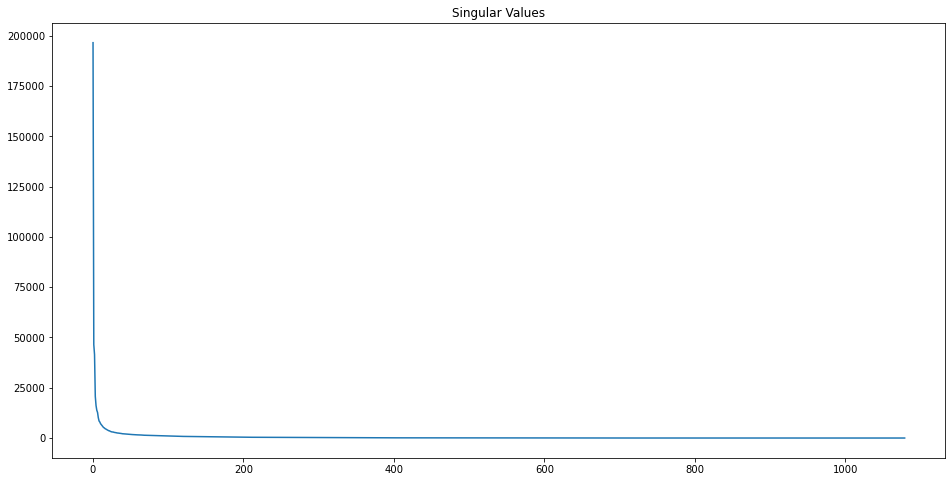

In [19]:
plt.plot(np.diag(S))
plt.title('Singular Values')
plt.show()

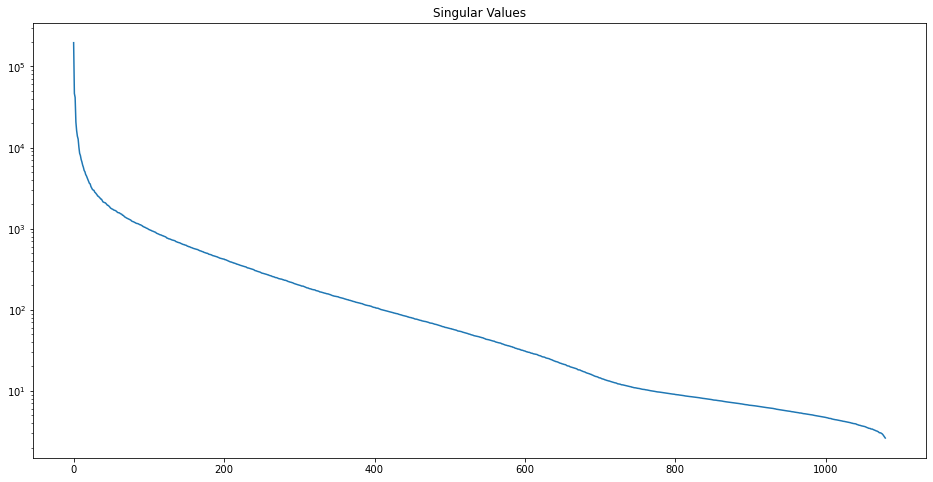

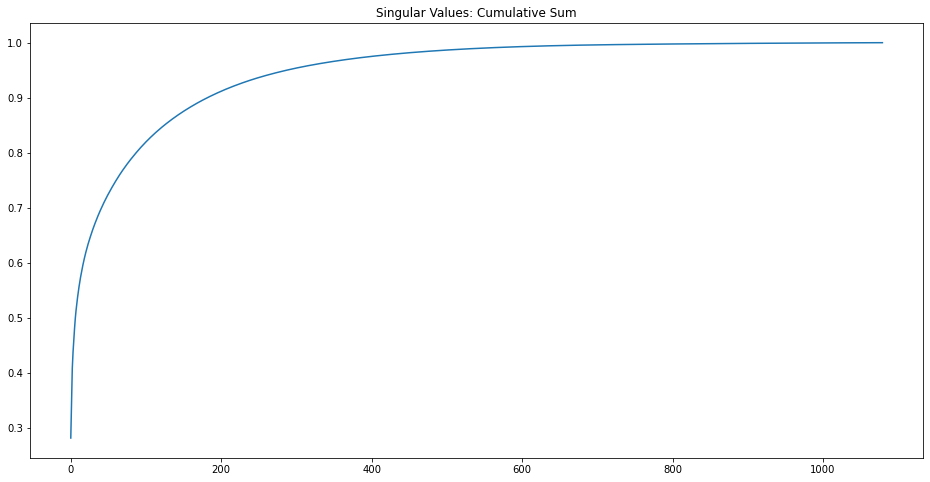

In [18]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()